# Introduction to Combinatorial and Polyhedral Geometry in Sage

## Important pages available online:

- General Page: https://doc.sagemath.org/html/en/reference/discrete_geometry/index.html
- Thematic Tutorials: https://doc.sagemath.org/html/en/thematic_tutorials/geometry.html

## Wiki Pages on Development:

- Development Wiki page: https://wiki.sagemath.org/OptiPolyGeom    (Older but still used)
- Trac Wiki page: https://trac.sagemath.org/wiki/SagePolyhedralGeometry

## The Basics: $V$-representation

First, let’s define a polyhedron object as the convex hull of a set of points and some rays.

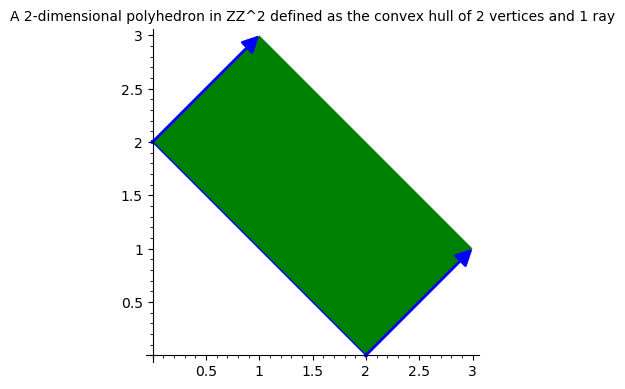

In [2]:
P1 = Polyhedron(vertices=[[2, 0], [0, 2]], rays=[[1, 1]], base_ring=ZZ);P1

### The string representation already gives a lot of information:

* the dimension of the polyhedron (the smallest affine space containing it)
* the dimension of the space in which it is defined
* the base ring ($\mathbb{Z}^2$) over which the polyhedron lives (this specifies the parent class)
* the number of vertices
* the number of rays

#### The usual tab completion shows us everything we can do:

In [4]:
P1.

SyntaxError: invalid syntax (<ipython-input-4-d51298c2fa1e>, line 1)

### We can also add a lineality space.

In [12]:
P2 = Polyhedron(vertices=[[0.5, 0, 0], [0, 0.5, 0]], rays=[[1, 1, 0]], lines=[[0, 0, 1]]);P2

A 3-dimensional polyhedron in RDF^3 defined as the convex hull of 2 vertices, 1 ray, 1 line (use the .plot() method to plot)

In [13]:
P2.plot()

Graphics3d Object

### The objects have a specific parent (base ring) and a specific backend

In [14]:
P1.parent(), P1.backend()

(Polyhedra in ZZ^2, 'ppl')

In [15]:
P2.parent(), P2.backend()

(Polyhedra in RDF^3, 'cdd')

### These two (base ring & backend) determine which methods and algorithms are available/used.

## $H$-representation

If a polyhedron object was constructed via a $V$-representation, Sage can provide the $H$-representation of the object.

In [16]:
for h in P1.Hrepresentation():
    print(h)

An inequality (1, -1) x + 2 >= 0
An inequality (1, 1) x - 2 >= 0
An inequality (-1, 1) x + 2 >= 0


In [17]:
newP1 = Polyhedron(ieqs=[[2,1,-1],[-2,1,1],[2,-1,1]]); newP1 == P1

True

In [18]:
Polyhedron?

### A large library of precomputed examples:

http://doc.sagemath.org/html/en/reference/discrete_geometry/sage/geometry/polyhedron/library.html


In [19]:
oht = polytopes.one_hundred_twenty_cell(exact=True,backend='normaliz');oht.show(frame=False)

Graphics3d Object

In [20]:
oht.f_vector(), oht.base_ring()

((1, 600, 1200, 720, 120, 1),
 Number Field in sqrt5 with defining polynomial x^2 - 5 with sqrt5 = 2.236067977499790?)

## Representation of objects

Sage has classes implemented for $H$- and $V$-representations and faces of polyhedron.

### $H$-representation

You can store the $H$-representation in a variable and use the inequalities and equalities as objects.

In [21]:
HRep = P2.Hrepresentation()

In [22]:
H1 = HRep[0]; H1

An inequality (-2.0, 2.0, 0.0) x + 1.0 >= 0

In [23]:
 H1.A(), H1.b()

((-2.0, 2.0, 0.0), 1.0)

In [24]:
H1.contains(vector([0,0,0]))

True

### $V$-representation

Similarly, you can access vertices, rays and lines of the polyhedron.

In [25]:
VRep = P2.Vrepresentation(); VRep

(A line in the direction (0.0, 0.0, 1.0),
 A ray in the direction (1.0, 1.0, 0.0),
 A vertex at (0.5, 0.0, 0.0),
 A vertex at (0.0, 0.5, 0.0))

In [26]:
L = VRep[0]; L

A line in the direction (0.0, 0.0, 1.0)

In [28]:
list(L.neighbors())

[A ray in the direction (1.0, 1.0, 0.0),
 A vertex at (0.5, 0.0, 0.0),
 A vertex at (0.0, 0.5, 0.0)]

### Faces:

In [31]:
aface = P1.faces(1)[1];aface

A 1-dimensional face of a Polyhedron in ZZ^2 defined as the convex hull of 2 vertices

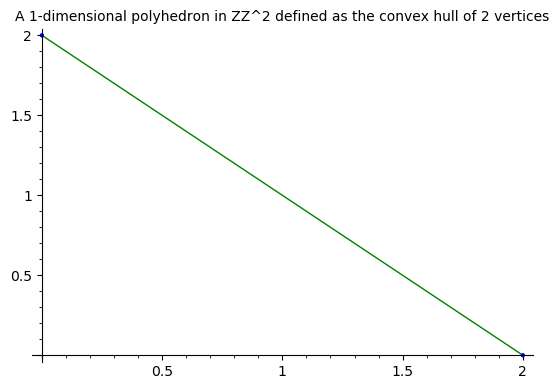

In [33]:
aface.

# The algebra of polytopes: classical operations

### Polar and Dilation

In [34]:
Cube = polytopes.cube()          # [-1,1]-cube
Octahedron = 3/2 * Cube.polar()  # Dilation

### Minkowski sum

In [35]:
Cuboctahedron = Cube + Octahedron # Minkowski sum
Cuboctahedron.show()

Graphics3d Object

### Minkowski difference (when it makes sense)

In [36]:
Mdiff = Cuboctahedron - Cube  # Minkowski difference
Mdiff.plot()

Graphics3d Object

### Intersection

In [37]:
Permu = Cube & Octahedron   # Intersection, same as   Cube.intersection(Octahedron)
Permu.show(opacity=0.5)

Graphics3d Object

### Question to Sage developers listening: is this a bug ?

### Cartesian product

In [38]:
CP = Cube * Octahedron; CP   # Cartesian product

A 6-dimensional polyhedron in QQ^6 defined as the convex hull of 48 vertices (use the .plot() method to plot)

In [39]:
CP.f_vector()

(1, 48, 168, 244, 182, 72, 14, 1)

### Affine transformation through coersion

In [40]:
zo_cube = polytopes.cube(intervals='zero_one').change_ring(QQ) # (0,1) 3-d cube
transformation = matrix(AA,[[1,sqrt(2),sqrt(3)],[0,1,sqrt(5)],[0,0,1]])
skew_cube = (transformation * zo_cube) + vector([0,0,1/2])   # affinely transformed
skew_cube.plot(color='blue',opacity=0.75) + zo_cube.plot(color='red',opacity=0.75)

Graphics3d Object

In [41]:
print("The cube base ring is: {}".format(zo_cube.base_ring()))
print("The skew cube base ring is: {}\n".format(skew_cube.base_ring()))
print("The cube backend is: {}".format(zo_cube.backend()))
print("The skew cube backend is: {}".format(skew_cube.backend()))

The cube base ring is: Rational Field
The skew cube base ring is: Algebraic Real Field

The cube backend is: ppl
The skew cube backend is: field


## Combinatorial equivalence

In [42]:
co = polytopes.cuboctahedron()
another_co = Cube & (2 * Cube.polar())
yet_another_co = Cube.truncation(1/2)

co.is_combinatorially_isomorphic(another_co), co.is_combinatorially_isomorphic(yet_another_co)

(True, True)

### There are many more operations that are possible: http://doc.sagemath.org/html/en/thematic_tutorials/geometry/polyhedra_quickref.html

## A cool trick to get back the input of an object:


In [43]:
An_important_polytope = skew_cube & zo_cube  # This was hard to compute... let's say!
sage_input(An_important_polytope)

R.<y> = QQ[]
v = AA.polynomial_root(AA.common_polynomial(y^8 - 12*y^6 + 23*y^4 - 12*y^2 + 1), RIF(RR(0.83755602382334116), RR(0.83755602382334127)))
Polyhedron(backend='field', base_ring=AA, vertices=[(AA(0), AA(0), AA(1/2)), (1/5*v^6 - 12/5*v^4 + 22/5*v^2 - 6/5, AA(1), 8/35*v^6 - 18/7*v^4 + 24/7*v^2 - 19/70), (AA(1), AA(0), AA(1/2)), (AA(1), 3/7*v^7 - 71/14*v^5 + 125/14*v^3 - 43/14*v, AA(1/2)), (AA(1), AA(1), 2/7*v^7 + 13/49*v^6 - 24/7*v^5 - 148/49*v^4 + 46/7*v^3 + 216/49*v^2 - 22/7*v - 79/98), (AA(1), AA(1), 8/35*v^6 - 18/7*v^4 + 24/7*v^2 - 19/70)])

## What if I want to include a polytope to my article in latex?
### First, you may want to have a look at the inequalities, just for sanity check:

In [47]:
print(Permu.Hrepresentation_str(style='<='))

 2*x0 + 2*x1 + 2*x2 <= 3
 2*x0 + 2*x1 - 2*x2 <= 3
 2*x0 - 2*x1 + 2*x2 <= 3
 2*x0 - 2*x1 - 2*x2 <= 3
                 x0 <= 1
                 x1 <= 1
                 x2 <= 1
-2*x0 - 2*x1 - 2*x2 <= 3
                -x2 <= 1
                -x1 <= 1
                -x0 <= 1
-2*x0 + 2*x1 + 2*x2 <= 3
-2*x0 + 2*x1 - 2*x2 <= 3
-2*x0 - 2*x1 + 2*x2 <= 3


### Then, you can create the latex code:

In [48]:
latex_code = LatexExpr(Permu.Hrepresentation_str(latex=True))
print(latex_code)
view(latex_code)

\begin{array}{rcl}
-2 \, x_{0} - 2 \, x_{1} - 2 \, x_{2} & \geq & -3 \\
-2 \, x_{0} - 2 \, x_{1} + 2 \, x_{2} & \geq & -3 \\
-2 \, x_{0} + 2 \, x_{1} - 2 \, x_{2} & \geq & -3 \\
-2 \, x_{0} + 2 \, x_{1} + 2 \, x_{2} & \geq & -3 \\
                               -x_{0} & \geq & -1 \\
                               -x_{1} & \geq & -1 \\
                               -x_{2} & \geq & -1 \\
 2 \, x_{0} + 2 \, x_{1} + 2 \, x_{2} & \geq & -3 \\
                                x_{2} & \geq & -1 \\
                                x_{1} & \geq & -1 \\
                                x_{0} & \geq & -1 \\
 2 \, x_{0} - 2 \, x_{1} - 2 \, x_{2} & \geq & -3 \\
 2 \, x_{0} - 2 \, x_{1} + 2 \, x_{2} & \geq & -3 \\
 2 \, x_{0} + 2 \, x_{1} - 2 \, x_{2} & \geq & -3 
\end{array}


### Then, maybe you would like to add a tikz picture of your polytope...

In [49]:
Permu.plot(opacity=0.75,frame=False)

Graphics3d Object

In [51]:
latex.add_to_preamble("\\usepackage{tikz}")     # internal pdf compiler
tikz_code = Permu.projection().tikz([-0.3335,-0.5165,-0.7887],126.02,scale=4,opacity=0.25,facet_color='green')
view(tikz_code)

### The code is easy to read:

In [52]:
print('\n'.join(tikz_code.splitlines()[:20]))

\begin{tikzpicture}%
	[x={(-0.411447cm, -0.364359cm)},
	y={(0.911434cm, -0.164433cm)},
	z={(-0.000048cm, 0.916627cm)},
	scale=4.000000,
	back/.style={loosely dotted, thin},
	edge/.style={color=blue!95!black, thick},
	facet/.style={fill=green,fill opacity=0.250000},
	vertex/.style={inner sep=1pt,circle,draw=green!25!black,fill=green!75!black,thick,anchor=base}]
%
%
%% Coordinate of the vertices:
%%
\coordinate (0.00000, 1.00000, -0.50000) at (0.00000, 1.00000, -0.50000);
\coordinate (0.00000, 1.00000, 0.50000) at (0.00000, 1.00000, 0.50000);
\coordinate (1.00000, 0.00000, 0.50000) at (1.00000, 0.00000, 0.50000);
\coordinate (1.00000, -0.50000, 0.00000) at (1.00000, -0.50000, 0.00000);
\coordinate (0.50000, 1.00000, 0.00000) at (0.50000, 1.00000, 0.00000);
\coordinate (1.00000, 0.00000, -0.50000) at (1.00000, 0.00000, -0.50000);
\coordinate (1.00000, 0.50000, 0.00000) at (1.00000, 0.50000, 0.00000);


## See more details here: http://page.mi.fu-berlin.de/labbe/polytope.html

### You may have computed the f-vector, and would like to save the object for later use or to send to a colleague...

In [53]:
Permu.f_vector()

(1, 24, 36, 14, 1)

In [54]:
# Saves in the current folder
Permu.save('somecoolpolytope.sobj')

In [55]:
loadedpolytope = load("somecoolpolytope")

### The f-vector is preserved after saving:

In [56]:
loadedpolytope.f_vector.is_in_cache()   # Since Sage 9.1

True

# Internal backends for computations

### There are several possible backends to do computations with polyhedral objects. The performance and possible base rings differ depending on the chosen backend/engine:

- ppl ($\mathbb{Z},\mathbb{Q}$)
- cdd ($\mathbb{Q}$,RDF)
- normaliz ($\mathbb{Z},\mathbb{Q}$, Algebraic numbers)
- native python "field" ($\mathbb{Z},\mathbb{Q}$, Algebraic numbers)
- polymake ($\mathbb{Z},\mathbb{Q}$, quadratic extensions)


### Some engines: 
- topcom (triangulations)
- lrs (triangulations)
- latte_int (triangulations, volume, integer counts)

### The features of each backend are steadily under development and constantly improving. (We need feedback to know which features of which backends are desired!)

### A good example is to compute the volume of a polytope:

In [57]:
Permu.volume()  # default

4

In [58]:
Permu.volume(engine='latte')  # uses LattE Integrale

4

In [59]:
# uses normaliz, which requires to change the backend.
Permu.base_extend(base_ring=QQ,backend='normaliz').volume(engine='normaliz')

4

In [60]:
Permu.volume(engine='lrs')

4.0

## Certain backends have some more features that are interfaced. $h^*$-vector is an example with normaliz:

In [61]:
Cube = polytopes.cube(intervals='zero_one',backend='normaliz')   # [0,1]-cube
Cube.h_star_vector()

[1, 4, 1]

### Ehrhart polynomials are also available through latte or normaliz

In [62]:
Cube.ehrhart_polynomial(engine='latte').factor()  # Computed via latte

(t + 1)^3

In [63]:
Cube.ehrhart_polynomial(engine='normaliz').factor()  # Computed via normaliz, the backend should be normaliz

(t + 1)^3

## Algebraic polyhedra

### In https://arxiv.org/abs/1910.05241 [Doolittle-L-Lange-Sinn-Spreer-Ziegler] we used Sage to certify that the cyclic polytope $C_4(7)$ has realizations with all its vertices on a sphere.

## $\Rightarrow$ This required fast, exact arithmetic computations of convex hulls over algebraic number fields

## Thanks to the e-antic, (py)normaliz, and Sage development teams, this was made possible!

### (An article is in preparation with Bruns, Delecroix, Gutsche, Köppe, L)